# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_model_comparison, plot_simulation_comparison1, plot_simulation_comparison2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 6'
S_True = sys_from_file(test_set + ' C')
S_MPL = sys_from_file(test_set + ' B')
S_Nom = sys_from_file(test_set + ' A')

System read from file @ system_model/System Model 6 C.pickle 

System read from file @ system_model/System Model 6 B.pickle 

System read from file @ system_model/System Model 6 A.pickle 



In [3]:
ret_sim = simulation_model_comparison(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.9500


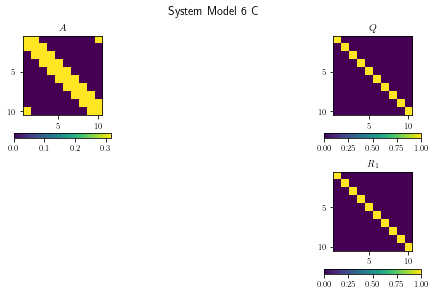

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.9500


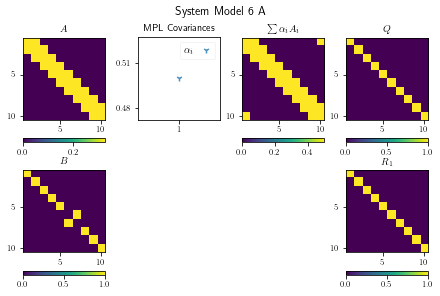

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_A']['A'])))))
system_display_matrix(ret_sim['system_A'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.9500


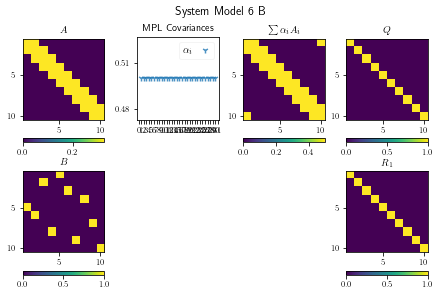

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_B']['A'])))))
system_display_matrix(ret_sim['system_B'])

#### Simulation - Trajectory, Control Input and Costs

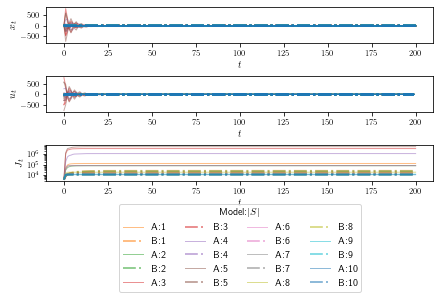

In [7]:
plot_simulation_comparison1(ret_sim)

#### Actuator set comparison

Control sets are different


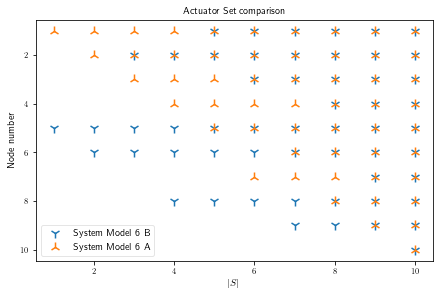

In [8]:
actuator_comparison(ret_sim['system_B'], ret_sim['system_A'], disptext=True, figplt=True);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_A']['costs']:
    print ("|S|: %s | Nom: %.4e | MPL: %.4e | Diff (Nom-MPL) %.4e (%.2f %% of Nom)" % (key, ret_sim['T_A']['costs'][key][-1], ret_sim['T_B']['costs'][key][-1], ret_sim['T_A']['costs'][key][-1]-ret_sim['T_B']['costs'][key][-1], (ret_sim['T_A']['costs'][key][-1]-ret_sim['T_B']['costs'][key][-1])*100/ret_sim['T_A']['costs'][key][-1]))

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 1.3650e+05 | MPL: 2.6720e+04 | Diff (Nom-MPL) 1.0978e+05 (80.42 % of Nom)
|S|: 2 | Nom: 8.3841e+04 | MPL: 2.4115e+04 | Diff (Nom-MPL) 5.9725e+04 (71.24 % of Nom)
|S|: 3 | Nom: 3.6920e+06 | MPL: 1.7428e+04 | Diff (Nom-MPL) 3.6745e+06 (99.53 % of Nom)
|S|: 4 | Nom: 1.2231e+06 | MPL: 1.4407e+04 | Diff (Nom-MPL) 1.2087e+06 (98.82 % of Nom)
|S|: 5 | Nom: 5.5872e+06 | MPL: 1.3528e+04 | Diff (Nom-MPL) 5.5737e+06 (99.76 % of Nom)
|S|: 6 | Nom: 8.6014e+04 | MPL: 1.2911e+04 | Diff (Nom-MPL) 7.3104e+04 (84.99 % of Nom)
|S|: 7 | Nom: 8.5624e+04 | MPL: 1.2175e+04 | Diff (Nom-MPL) 7.3448e+04 (85.78 % of Nom)
|S|: 8 | Nom: 1.9909e+04 | MPL: 1.2010e+04 | Diff (Nom-MPL) 7.8985e+03 (39.67 % of Nom)
|S|: 9 | Nom: 1.2925e+04 | MPL: 1.1838e+04 | Diff (Nom-MPL) 1.0873e+03 (8.41 % of Nom)
|S|: 10 | Nom: 1.1516e+04 | MPL: 1.1485e+04 | Diff (Nom-MPL) 3.0297e+01 (0.26 % of Nom)


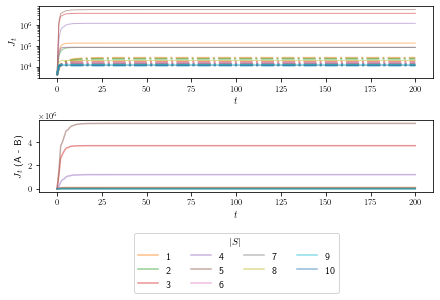

In [10]:
plot_simulation_comparison2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
